## AAG01 Rascunho

Vou refazer usando o DataSet

In [14]:
import matplotlib.pyplot as plt
import numpy as np
amostra_discreta = [1, 2, 3, 3, 4, 4, 4, 4, 5, 6]
amostra_continua = [1.5, 2.3, 2.9, 3.7, 3.5, 2.1, 3.0, 4.1, 1.8, 3.3]

### Função PMF (Massa de Probabilidade)

$$
P(X=x)=f(x)=Pr(X=x)
$$

In [15]:
def calcular_pmf_discreta(data):
    frequencias = {}
    for valor in data:
        if valor in frequencias:
            frequencias[valor] += 1
        else:
            frequencias[valor] = 1
    total = len(data)
    pmf = {valor: frequencia / total for valor, frequencia in frequencias.items()}
    return pmf

In [16]:
pmf_discreta = calcular_pmf_discreta(amostra_discreta)
print ("PMF:", pmf_discreta)

PMF: {1: 0.1, 2: 0.1, 3: 0.2, 4: 0.4, 5: 0.1, 6: 0.1}


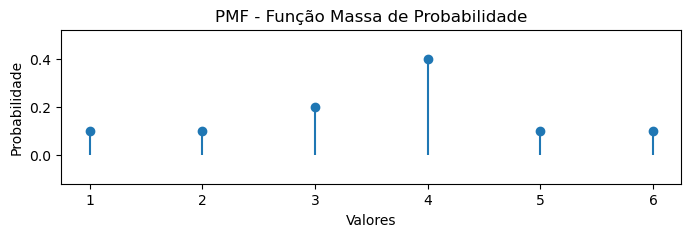

In [17]:
valores = list(pmf_discreta.keys())
probabilidades = list(pmf_discreta.values())
plt.figure(figsize=(8, 2))
plt.margins(y=0.3)
markerline, stemlines, baseline = plt.stem(valores, probabilidades)
plt.setp(baseline, visible=False)
plt.title("PMF - Função Massa de Probabilidade")
plt.xlabel("Valores")
plt.ylabel("Probabilidade")
plt.show()

### Função CDF (Distribuição Acumulada)

$$
F(x) = P(X \leq x) = \sum_{k=0}^{x} f(k)
$$

In [18]:
def calcular_cdf_discreta(data):
    pmf = calcular_pmf_discreta(data)
    cdf = {}
    soma_acumulada = 0
    for valor in sorted(pmf.keys()):
        soma_acumulada += pmf[valor]
        cdf[valor] = soma_acumulada
    return cdf

In [19]:
cdf_discreta = calcular_cdf_discreta(amostra_discreta)
print ("CDF:", cdf_discreta)

CDF: {1: 0.1, 2: 0.2, 3: 0.4, 4: 0.8, 5: 0.9, 6: 1.0}


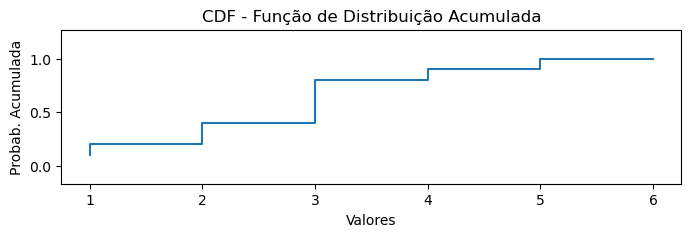

In [20]:
valores = list(cdf_discreta.keys())
probabilidades = list(cdf_discreta.values())
plt.figure(figsize=(8, 2))
plt.margins(y=0.3)
plt.step(valores, probabilidades)
plt.title("CDF - Função de Distribuição Acumulada")
plt.xlabel("Valores")
plt.ylabel("Probab. Acumulada")
plt.show()

### PDF, CDF Amostra Contínua
Usar scipy.stats?

In [21]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(amostra_continua)
x_valores = np.linspace(min(amostra_continua) - 0.5, max(amostra_continua) + 0.5, 100)

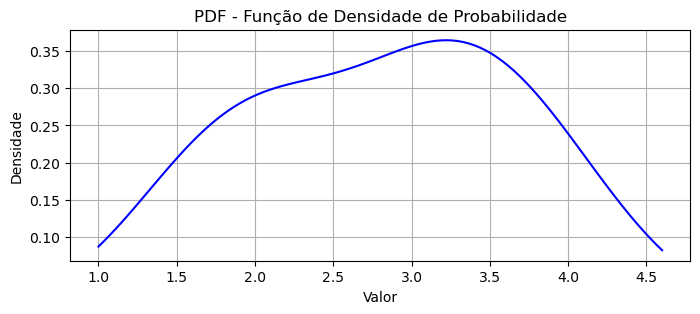

In [22]:
pdf_valores = kde(x_valores)
plt.figure(figsize=(8, 3))
plt.plot(x_valores, pdf_valores, label="PDF", color='blue')
plt.title("PDF - Função de Densidade de Probabilidade")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.grid(True)

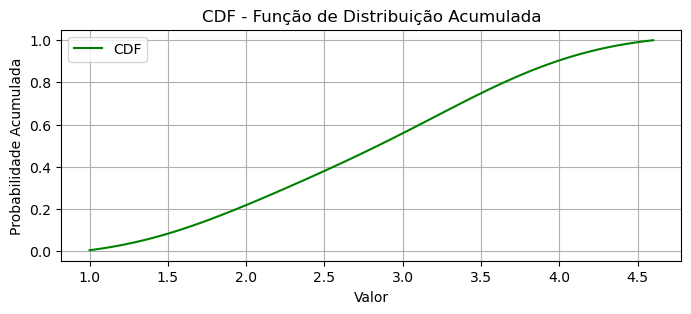

In [23]:
cdf_valores = np.cumsum(pdf_valores)
cdf_valores = cdf_valores / cdf_valores[-1] 
plt.figure(figsize=(8, 3))
plt.plot(x_valores, cdf_valores, label="CDF", color='green')
plt.title("CDF - Função de Distribuição Acumulada")
plt.xlabel("Valor")
plt.ylabel("Probabilidade Acumulada")
plt.grid(True)
plt.legend()